In [155]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.ticker as mticker

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

import pylatexenc.latexencode as pltx

In [2]:
#frequenze suggerite
print(np.logspace(1,2.8, 4, base=10).round(-1))
print(np.logspace(2.8,5.5, 20,base=10).round(-1)[1:])

#frequenze intorno alla frequenza di taglio
print([500,750,800,950,1000,1050,1100,1150,1300,1500])

[ 10.  40. 160. 630.]
[   880.   1210.   1680.   2340.   3240.   4490.   6230.   8650.  11990.
  16640.  23080.  32010.  44400.  61580.  85420. 118490. 164360. 227980.
 316230.]
[500, 750, 800, 950, 1000, 1050, 1100, 1150, 1300, 1500]


# Parte 1 - K=2.5

In [3]:
freq1 = [np.hstack((np.array([9.625,26.15,39.931,60.762,98.36,157.3,306.06,496.5,564.28,629.15,755.00,886.20,938.86])*10**-3,
                   np.array([1.0580,1.215,1.3025,1.5008,1.6158,2.2816,3.2393,4.4964,6.246]))),"Frequenza (kHz)"] #kHz

sigma_freq1 = np.around((freq1[0]*10**3)*0.03, 3)
#print(freq1[0]*10**3)
#print(sigma_freq1)

vin1 = [np.array([0.980,0.96,0.98,0.98,0.98,0.96,0.96,0.96,0.96,0.96,0.96,0.96,1.01,
                 0.98,0.96,0.98,0.96,1.01,0.96,0.98,0.98,0.96]),"Vin(V)"] #V

sigma_vin1 = np.around(vin1[0]*0.03,2)
#print(sigma_vin1)

vout1 = [np.array([2.27,2.27,2.27,2.27,2.29,2.29,2.43,2.73,2.93,3.14,3.62,4.00,4.00,
                  3.58,2.65,2.21,1.51,1.25,0.58,0.34,0.22,0.16]),"Vout(V)"] #V
sigma_vout1 = np.around(vout1[0]*0.03,2)
#print(sigma_vout1)

deltat1 = [-1*np.array([35,35,120,56,86,128,93.04,105.8,119.44,122.9,153.6,206.1,221.6,
                    262.96,277.8,283.2,267.92,256.8,186.96,139.74,108.29,78.78]),"\u03BCs"] #us
sigma_deltat1 = np.around(deltat1[0]*0.03,3)
#print(sigma_deltat1)

# Parte 2 - K circa 1.6

In [4]:
freq2 = [np.hstack((np.array([9.927,27.06,40.96,59.78,93.05,156.94,302.4,499.4,563.8,621,755.7,885.3,959])*10**-3,
                 np.array([1.0638,1.2105,1.3191,1.4880,1.6224,2.2875,3.2337,4.8730,6.170,8.4460,11.672,14.642]))),"Frequenza (kHz)"]
sigma_freq2 = np.around((freq2[0]*10**3)*0.03, 3)
#print(freq2[0]*10**3)
#print(sigma_freq2)

deltat2 = [-1*np.array([100,124,152,144,167,166.4,159.2,158.4,153.6,154.4,148.8,141.6,132.8,135.2,122.37,118.88,111.42,107.5,89.44,71.14,53.31,44.45,34.98,27.716,24.854]),"\u03BCs"]

vin2 = [np.array([0.95,0.95,0.96,0.95,0.95,0.96,0.96,0.95,0.96,0.96,0.96,0.95,0.96,0.96,0.95,0.95,0.96,0.96,0.96,0.95,0.96,0.96,0.96,0.95,0.95]),"Vin (V)"]
vout2 = [np.array([0.95,0.95,0.95,0.95,0.93,0.93,0.9,0.84,0.810,0.8,0.75,0.7,0.68,0.64,0.59,0.56,0.52,0.5,0.39,0.29,0.2,0.16,0.13,0.09,0.08]),"Vout (V)"]


sigma_vin2 = np.around(vin2[0]*0.03,2)
#print(sigma_vin2)

sigma_vout2 = np.around(vout2[0]*0.03,2)
#print(sigma_vout2)

sigma_deltat2 = np.around(deltat2[0]*0.03,3)
#print(sigma_deltat2)

In [148]:
def CreateFigure():
    return len(plt.get_fignums())

def printGraph(vout, vin, freq, deltat, mode):
    module = vout[0]/vin[0]
    freq_act = freq[0]*10**3
    deltat_act = deltat[0]*(10**-6)  #us
    delta_phi = ((2*np.pi*freq_act*deltat_act)*(180/np.pi))
    
    if(mode != "nograph"):
        plt.figure(CreateFigure())
        plt.xscale("log")
        plt.scatter(freq[0]*10**3,20*np.log(module), label="Dati raccolti")
        plt.axhline(-3, color="red", label="-3dB")
        plt.axvline(1008.88, label="$\\nu_C$ teorica", color="green")
        plt.legend()
        plt.xlabel("$\\nu$ (Hz)")
        plt.ylabel("Attenuazione (dB)")
        plt.grid()
        plt.title("Diagramma di Bode, Funzione di trasferimento")
        
        plt.figure(CreateFigure())
        plt.xscale("log")
        plt.scatter(freq_act, delta_phi, label="Dati raccolti")
        plt.xlabel("$\\nu$ (Hz)")
        plt.grid()
        plt.axhline(-45, label="- 45°", color="red")
        plt.axvline(1008.88, label="$\\nu_C$ teorica", color="green")
        plt.ylabel("Sfasamento (Deg)")
        plt.legend()
        plt.title("Diagramma di Bode, fase")
    
    sigma_freq = np.around((freq[0]*10**3)*0.03, 3)
    rel_freq = sigma_freq/freq[0]
    sigma_vin = np.around(vin[0]*0.03,2)
    rel_vin = sigma_vin/vin[0]
    sigma_vout = np.around(vout[0]*0.03,2)
    rel_vout = sigma_vout/vout[0]
    sigma_deltat = np.around(deltat[0]*0.03,3)
    rel_deltat = sigma_deltat/deltat[0]
    
    sigma_module = rel_vin + rel_vout
    sigma_deltaphi = (rel_deltat + rel_freq)
    
    return module, sigma_module, delta_phi, sigma_deltaphi
    
def doublebode(vout1, vin1, freq1, deltat1, vout2, vin2, freq2, deltat2):
    fig = plt.figure(CreateFigure())
    ax1 = fig.add_subplot()
    
    module1, sigma_module1, delta_phi1, sigma_deltaphi1 = printGraph(vout1, vin1, freq1, deltat1, "nograph")
    module2, sigma_module2, delta_phi2, sigma_deltaphi2 = printGraph(vout2, vin2, freq2, deltat2, "nograph")
    
    #definisco una funzione di linearità
    def func(x, m, c):
        return m*x+c
    
    #faccio il fit lineare per 1
    #print(len(freq1[0]))
    #print(len(module1))
    #print(len(sigma_module1))
    param_L,cov_L=curve_fit(func,freq1[0],module1,sigma=sigma_module1)
    m_L=param_L[0]
    sigma_m_L=cov_L[0,0]
    c_L=param_L[1]
    sigma_c=cov_L[1,1]
    x_fit_L=np.linspace(freq1[0].min(),freq1[0].max(),100)
    y_fit_L=func(x_fit_L,m_L,c_L)
    plt.plot(x_fit_L,20*np.log10(y_fit_L),color="purple",label="fit")
    
    plt.xscale("log")
    ax1.scatter(freq1[0]*10**3,20*np.log(module1), marker="o",label="Dati per K=2.5")
    ax1.scatter(freq2[0]*10**3,20*np.log(module2), marker="o", color="blue", label="Dati per K circa 1.6")
    plt.axhline(-3, color="red", label="-3dB")
    plt.axvline(1008.88, label="$\\nu_C$ teorica", color="green")
    plt.legend()
    plt.xlabel("$\\nu$ (Hz)")
    plt.ylabel("Attenuazione (dB)")
    plt.grid()
    plt.title("Diagramma di Bode, Funzione di trasferimento")
    
def doublephase(vout1, vin1, freq1, deltat1, vout2, vin2, freq2, deltat2):
    fig = plt.figure(CreateFigure())
    ax1 = fig.add_subplot()
    
    freq_act1 = freq1[0]*10**3
    freq_act2 = freq2[0]*10**3
    deltat_act1 = deltat1[0]*(10**-6)  #us
    deltat_act2 = deltat2[0]*(10**-6)  #us
    delta_phi1 = ((2*np.pi*freq_act1*deltat_act1)*(180/np.pi))
    delta_phi2 = ((2*np.pi*freq_act2*deltat_act2)*(180/np.pi))
    plt.xscale("log")
    ax1.scatter(freq_act1, delta_phi1, label="Dati per K=2.5")
    ax1.scatter(freq_act2, delta_phi2,  marker="o", color="blue", label="Dati per K circa 1.6")
    plt.xlabel("$\\nu$ (Hz)")
    plt.grid()
    plt.axhline(-45, label="- 45°", color="red")
    plt.axvline(1008.88, label="$\\nu_C$ teorica", color="green")
    plt.ylabel("Sfasamento (Deg)")
    plt.legend()
    plt.title("Diagramma di Bode, fase")

# K = 2.5

[0.061 0.062 0.061 0.061 0.061 0.062 0.06  0.061 0.062 0.06  0.062 0.061
 0.06  0.061 0.061 0.062 0.064 0.062 0.066 0.06  0.076 0.031]
[30.056 30.011 30.032 30.032 30.032 30.03  30.031 30.03  30.029 30.029
 30.03  30.03  30.03  30.03  30.03  30.03  30.03  30.03  30.03  30.03
 30.03  30.03 ]


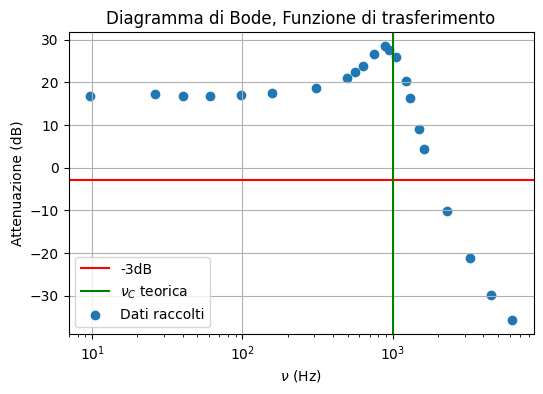

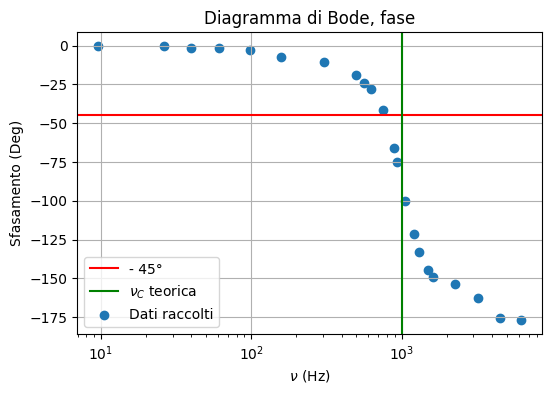

In [154]:
module1, sigma_module1, delta_phi1, sigma_deltaphi1 = printGraph(vout1, vin1, freq1, deltat1,"")
print(np.around(sigma_module1,3))
print(np.around(sigma_deltaphi1,3))

# K circa 1.6

[0.063 0.063 0.063 0.063 0.064 0.064 0.065 0.067 0.056 0.056 0.058 0.06
 0.061 0.062 0.065 0.067 0.07  0.071 0.057 0.066 0.081 0.031 0.031 0.032
 0.032]
[30.049 30.037 30.035 30.023 30.025 30.029 30.03  30.03  30.03  30.03
 30.03  30.03  30.03  30.03  30.03  30.03  30.03  30.03  30.03  30.03
 30.03  30.03  30.03  30.03  30.03 ]


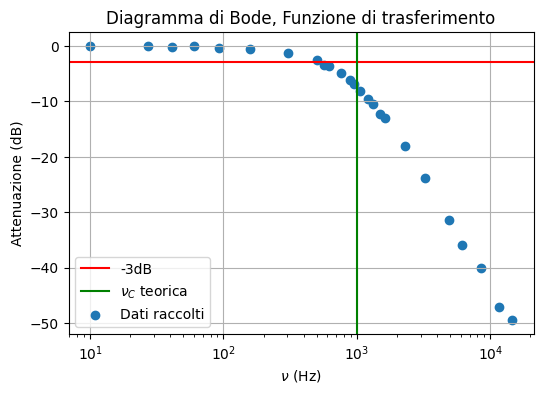

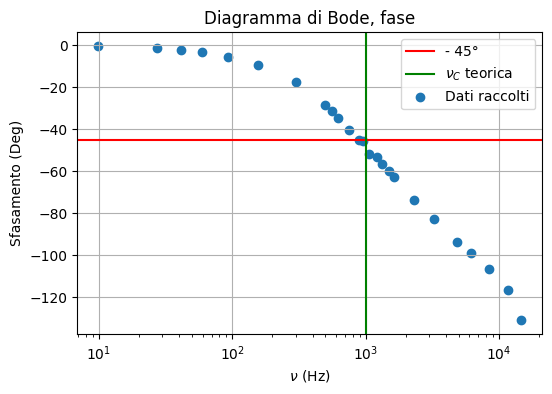

In [8]:
module2, sigma_module2, delta_phi2, sigma_deltaphi2 = printGraph(vout2, vin2, freq2, deltat2,"")
print(np.around(sigma_module2,3))
print(np.around(sigma_deltaphi2,3))

C:\Users\aless\source\repos\physics_labs\Physics\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


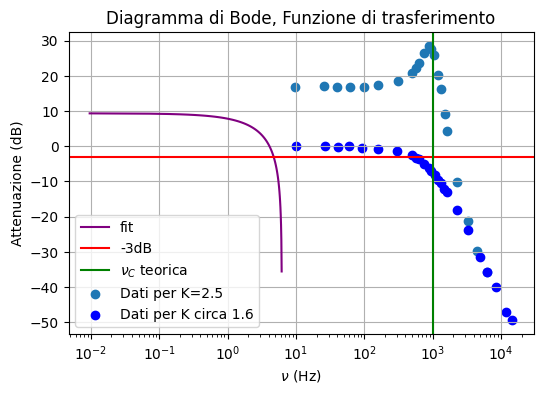

In [149]:
doublebode(vout1, vin1, freq1, deltat1, vout2, vin2, freq2, deltat2)
#doublephase(vout1, vin1, freq1, deltat1, vout2, vin2, freq2, deltat2)

In [10]:
#gli RMS dipendono dalla tensione di alimentazione dell'OP-AMP

In [114]:
def dataFrame(freq,v_in,v_out,delta_t):
    
        #FUNCTION THAT TRANSLATES THE DATA
        def DataTraslator(data):
            finaldata = []
            i = 0
            while i < buff:
                row = []
                for j in data:
                    row.append(j[i])
                finaldata.append(row)
                i += 1
            return finaldata
        
        
        
        #calcolo i dati indiretti ed i sigma
        module, sigma_module, delta_phi, sigma_deltaphi = printGraph(v_out, v_in, freq, delta_t, "nograph")
        #sigma_freq = np.around((freq[0])*0.03, 3)
        sigma_freq = (freq[0])*0.03
        rel_freq = sigma_freq/freq[0]
        
        #sigma_vin = np.around(v_in[0]*0.03,2)
        sigma_vin = v_in[0]*0.03
        rel_vin = sigma_vin/v_in[0]
        
        #sigma_vout = np.around(v_out[0]*0.03,2)
        sigma_vout = v_out[0]*0.03
        rel_vout = sigma_vout/v_out[0]
        
        #sigma_deltat = np.around(delta_t[0]*0.03,3)
        sigma_deltat = delta_t[0]*0.03
        rel_deltat = sigma_deltat/delta_t[0]
        
        data = [freq[0],v_in[0],v_out[0],module,delta_t[0],delta_phi]
        
        #check on the sizes
        buff = 0
        flag = 0
        for i in data:
            if buff == 0:
                buff = i.size
            elif i.size != buff:
                flag = 1
                break
        if flag == 1:
            return "The data arrays must all have the same dimension" #throw exception for god's sake
        
        #traslate the data
        traslated = DataTraslator(data)
        
        #array of the column heads
        colheads = [freq[1],v_in[1],v_out[1],"|T(\u03C9)|",delta_t[1],"\u0394\u03C6"]
        
        df = pd.DataFrame(np.array(traslated),
                            columns=colheads)
        
        df = df.sort_values(by=[freq[1]])
        
        #errori = [np.around(sigma_freq,3).tolist(),np.around(sigma_vin,3).tolist(),
        #          np.around(sigma_vout,3).tolist(),np.around(sigma_module,3).tolist(),
        #          np.around(sigma_deltat,3).tolist(),np.around(sigma_deltaphi,3).tolist()]
        errori = [sigma_freq,sigma_vin,sigma_vout,sigma_module,sigma_deltat,sigma_deltaphi]
        datafinale = []
        outercnt = 0
        
        while outercnt < len(data):
            print(colheads[outercnt])
            
            #studying = np.around(df.iloc[:,outercnt],6).tolist()
            studying = df.iloc[:,outercnt]
            
            
            cnt = 0
            buffer = []
            for row in studying:
                sx = row
                dx = errori[outercnt][cnt]
                
                #controllo scaling kHz per le frequenze
                kflag = 0
                varswitch = 0
                if "Frequenza" in colheads[outercnt]:
                    if sx < 1:
                        sx = sx*10**3
                        dx = dx*10**3
                        kflag = 1
                    else:
                        varswitch = 1
                else:
                    roundfactor = 3
                    sx = np.round(sx, roundfactor)
                    dx = np.round(dx, roundfactor)
                    varswitch = 2
                
                
                #controllo cifre significative
                sx_cifre = len(str(sx).split(".")[1])
                dx_cifre = len(str(dx).split(".")[1])
                if sx_cifre > dx_cifre:
                    #innercnt = 0
                    #dxtmp = str(dx)
                    #while innercnt < (sx_cifre-dx_cifre):
                    #    dxtmp += "0"
                    #    innercnt += 1
                    #dx = float(dxtmp)
                    sx = np.around(sx,dx_cifre)
                elif sx_cifre < dx_cifre:
                    #sx = np.round(sx,dx_cifre)
                    dx = np.around(dx,sx_cifre)
                
                
                
                
                
                if varswitch == 0:
                    var = "§§§("+str(sx)+"@@@"+str(dx)+")§§§"
                elif varswitch == 1:
                    var = "§§§("+str(sx)+"@@@"+str(dx)+")k§§§"
                elif varswitch == 2:
                    var = "§§§("+str(sx)+"@@@"+str(dx)+")§§§"
                
                buffer.append(var)
                cnt+=1
            datafinale.append(buffer)
            outercnt += 1
        
        df2 = pd.DataFrame(DataTraslator(datafinale), columns=colheads)
        
        return df2

In [115]:
df1 = dataFrame(freq1,vin1,vout1,deltat1)
print(df1.to_latex(index=False).replace("rrrrrr","|c|c|c|c|c|c|").replace("@@@","\pm").replace("§§§","$"))

Frequenza (kHz)
Vin(V)
Vout(V)
|T(ω)|
μs
Δφ
\begin{tabular}{llllll}
\toprule
         Frequenza (kHz) &              Vin(V) &             Vout(V) &                |T(ω)| &                      μs &                       Δφ \\
\midrule
   $(9.625\pm0.289)$ & $(0.98\pm0.03)$ & $(2.27\pm0.07)$ & $(2.316\pm0.061)$ &    $(-35.0\pm-1.0)$ &  $(-0.121\pm30.056)$ \\
    $(26.15\pm0.78)$ & $(0.96\pm0.03)$ & $(2.27\pm0.07)$ & $(2.365\pm0.062)$ &    $(-35.0\pm-1.0)$ &  $(-0.329\pm30.011)$ \\
$(39.931\pm1.19793)$ & $(0.98\pm0.03)$ & $(2.27\pm0.07)$ & $(2.316\pm0.061)$ &   $(-120.0\pm-3.6)$ &  $(-1.725\pm30.032)$ \\
  $(60.762\pm1.823)$ & $(0.98\pm0.03)$ & $(2.27\pm0.07)$ & $(2.316\pm0.061)$ &    $(-56.0\pm-1.7)$ &  $(-1.225\pm30.032)$ \\
    $(98.36\pm2.95)$ & $(0.98\pm0.03)$ & $(2.29\pm0.07)$ & $(2.337\pm0.061)$ &    $(-86.0\pm-2.6)$ &  $(-3.045\pm30.032)$ \\
     $(157.3\pm4.7)$ & $(0.96\pm0.03)$ & $(2.29\pm0.07)$ & $(2.385\pm0.062)$ &   $(-128.0\pm-3.8)$ &    $(-7.25\pm30.03)$ \\
   $(306.06\pm9

In [116]:
df2 = dataFrame(freq2,vin2,vout2,deltat2)
print(df2.to_latex(index=False).replace("rrrrrr","|c|c|c|c|c|c|").replace("@@@","\pm").replace("§§§","$"))

Frequenza (kHz)
Vin (V)
Vout (V)
|T(ω)|
μs
Δφ
\begin{tabular}{llllll}
\toprule
                    Frequenza (kHz) &             Vin (V) &            Vout (V) &                |T(ω)| &                       μs &                      Δφ \\
\midrule
              $(9.927\pm0.298)$ & $(0.95\pm0.03)$ & $(0.95\pm0.03)$ &     $(1.0\pm0.1)$ &    $(-100.0\pm-3.0)$ & $(-0.357\pm30.049)$ \\
             $(27.06\pm0.8118)$ & $(0.95\pm0.03)$ & $(0.95\pm0.03)$ &     $(1.0\pm0.1)$ &    $(-124.0\pm-3.7)$ & $(-1.208\pm30.037)$ \\
               $(40.96\pm1.23)$ & $(0.96\pm0.03)$ & $(0.95\pm0.03)$ &   $(0.99\pm0.06)$ &    $(-152.0\pm-4.6)$ & $(-2.241\pm30.035)$ \\
               $(59.78\pm1.79)$ & $(0.95\pm0.03)$ & $(0.95\pm0.03)$ &     $(1.0\pm0.1)$ &    $(-144.0\pm-4.3)$ & $(-3.099\pm30.023)$ \\
               $(93.05\pm2.79)$ & $(0.95\pm0.03)$ & $(0.93\pm0.03)$ & $(0.979\pm0.064)$ &    $(-167.0\pm-5.0)$ & $(-5.594\pm30.025)$ \\
              $(156.94\pm4.71)$ & $(0.96\pm0.03)$ & $(0.93\pm0.03)$ & $(